#CIS 545 Homework 1: Data Wrangling and Cleaning
> Spring 2022 | Due February 9th, 10:00 PM EST

Hello future data scientists and welcome to CIS 545! In this homework, you will familiarize yourself with Pandas 🐼! The cutest animal and one of the essential libraries for Data Science. This homework is focused on one of the most important tasks in Data Science, preparing datasets so that they can be analyzed, plotted, used for machine learning models, etc...

This homework will be broken into analyzing two datasets across three sections and a fourth section focusing on xpaths!

1. Working with NFT Sales data and Ethereum price data

2. Working on merged/joined versions of the two datasets (More on this later...)

**Note: Before starting, you must click on the "Copy To Drive" option in the top bar. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved** 

Run the following two cells to setup the notebook

In [ ]:
!pip3 install pandas==1.1.5
!pip3 install penngrader

In [ ]:
from penngrader.grader import *

# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html

In [ ]:
!wget -nc https://storage.googleapis.com/penn-cis545/ETH-USD.csv
!wget -nc https://storage.googleapis.com/penn-cis545/NFT_Sales.csv

File ‘ETH-USD.csv’ already there; not retrieving.

File ‘NFT_Sales.csv’ already there; not retrieving.



#What is Pandas?

<div class = "row">
<div class="column">
Apart from animals, Pandas is a Python library to aid with data manipulation/analysis. It is built with support from Numpy. Numpy is another Python package/library that provides efficient calculations for matricies and other math problems.
</div><div class="column">
<p class="d-flex" align = "center">
<img src = "https://thehill.com/sites/default/files/styles/article_full/public/panda_getty.jpg?itok=4ce_5sip" height= "200" align ="center"/>
<img src = "https://cff2.earth.com/uploads/2016/09/08101343/giant-panda-bear_1big_stock1.jpg" height= "200" align ="center"/>
</p>
</div>
</div>

Let's also get familiarized with the **PennGrader**. It was developed specifically for 545 by a previous TA, Leonardo Murri. 
<br>

PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [ ]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID =  67380955 # YOUR PENN-ID GOES HERE AS AN INTEGER #

In [ ]:
grader = PennGrader(homework_id = 'CIS545_Spring_2022_HW1', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 67380955

Make sure this correct or we will not be able to store your grade


Pandas (the animal) are lazy. Their days are made up of eating and sleeping. Just like mine. Let's run a cell just to make sure PennGrader works.

#### **TODO: PennGrader Check**
- Change `favorite_activity` to whichever panda "activity" you prefer (2 point)

<br>

**Note**: We'll use cells like these "TODO" above to indicate what is important to have in each section of the notebook. Some general guidelines:

- You don't have to do all of these in one cell/step; we're just labeling them for each section which might have smaller sub-sections (ex: look at how 1.2 is set up) for your reference
- Make sure to read these carefully and do everything that is asked
- Make sure to run all the PennGrader test cells; if we forgot anything, please let us know ASAP on Piazza so that we can update the Markdown cells here

In [ ]:
# In this cell, put which panda activity you prefer in lowercase(eating or sleeping)
# Input activity name in all lowercase
favorite_activity = 'sleeping'

In [ ]:
# Run this cell to submit to PennGrader!

# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'panda_test', answer = favorite_activity)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


You just had your first experience with the Penn Grader! For the future questions, once you have completed a question, you can submit your answer to the Penn Grader for immediate feedback. Awesome, right?

We will use scores from Penn Grader to determine your grade. You will still need to submit your notebook so we can check for cheating and plagarism. Do not cheat. 

**Note:** If you run Penn Grader after the due date for any question, your assignment will be marked late, even if you already had full points for the question before the deadline. To remedy this, if you're going to run your notebook after the deadline, either do not run the grading cells, or reinitialize the grader with an empty or clearly fake ID such as <code>999999999999</code> (please use 10+ digits to be clearly a fake <code>STUDENT_ID</code>)

#Adding our data so that our code can find it

We can't be data scientists without data! We provided code for you to download the data (the "wget" cell from earlier). If you go to the view on the left and click files, you should see something similar to this image
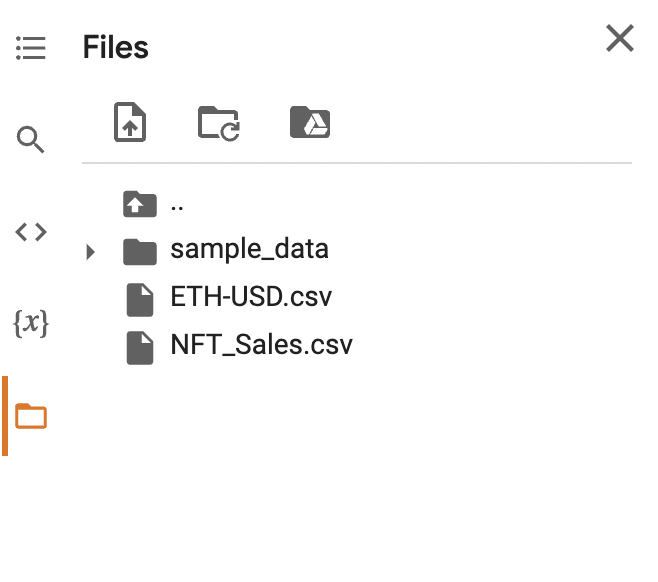

# Before you proceed

While running the import cells, you may have gotten the following warning:

```
WARNING: The following packages were previously imported in this runtime:
  [pandas]
You must restart the runtime in order to use newly installed versions.
```

Please *RESTART* the runtime (Ctrl + M or from the 'Runtime' menu) before proceeding if this is the case!

#Part 1: Working with NFT Sales and Ethereum Data

In this part of the homework we will be working with a dataset focused on NFT Sales and Ethereum rates! 

Let's first load our dataset into a Pandas Dataframe. Use Pandas's <code>read_csv</code> functionality, which you can find documentation for here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

While reading documentation is hard at first, we **strongly encourage you** to get into a good habit of it, since many times your questions will be answered directly by the documentation (ex: "why isn't my dataframe dropping duplicates" or "why didn't this dataframe update").

#### **TODO**
- Save the NFT Sales dataframe to a variable named: <code>nft_sales_df</code>
- Save the Ethereum dataframe to a variable named: <code>eth_df</code>

In [ ]:
# TODO: Import your two files to pandas dataframes -- make sure the dataframes are named correctly!
nft_sales_df = pd.read_csv("NFT_Sales.csv")
eth_df = pd.read_csv("ETH-USD.csv")

Let's focus on the `nft_sales_df` for now and see what the dataframe looks like. Display the first 10 rows of the dataframe in the cell below (take a look at the documentation to find now to do this!)

In [ ]:
# TODO: Display the first 10 rows of `nft_sales_df`
nft_sales_df.head(10)

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0
5,2017-06-27,5296.23,100,44.0,0,33.0,52.96,2092.91,33.0,10.0,0.0
6,2017-06-28,6543.49,115,46.0,0,15.0,56.90,1247.26,15.0,2.0,0.0
7,2017-06-29,8729.21,153,49.0,0,38.0,57.05,2185.72,38.0,3.0,0.0
8,2017-06-30,10437.36,174,53.0,0,21.0,59.98,1708.15,21.0,4.0,0.0
9,2017-07-01,13578.16,184,55.0,0,10.0,73.79,3140.80,10.0,2.0,0.0


Another thing that is often times helpful to do is inspect the types of each column in a dataframe. Output the types of `nft_sales_df` in this cell below. 

In [ ]:
# TODO: Display the datatypes in `nft_sales_df`
nft_sales_df.dtypes

Date                             object
Sales_USD_cumsum                float64
Number_of_Sales_cumsum            int64
Active_Market_Wallets_cumsum    float64
Primary_Sales_cumsum              int64
Secondary_Sales_cumsum          float64
AverageUSD_cum                  float64
Sales_USD                       float64
Number_of_Sales                 float64
Active_Market_Wallets           float64
Primary_Sales                   float64
dtype: object

Save the types of the Date, Sales_USD, Number_of_Sales, and Active_Market_Wallets columns to a series called `nft_sales_df_types` (retaining the index names) and pass them into the autograder cell below.

In [ ]:
nft_sales_df_types = nft_sales_df.dtypes[['Date', 'Sales_USD', 'Number_of_Sales', 'Active_Market_Wallets']]

In [ ]:
# View the output here!
nft_sales_df_types

Date                      object
Sales_USD                float64
Number_of_Sales          float64
Active_Market_Wallets    float64
dtype: object

In [ ]:
# TEST CASE: nft_sales_df_types (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'nft_sales_df_types', answer = nft_sales_df_types)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.1 Cleaning up NFT Sales

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows in `nft_sales_df` to clean up our data. Note that there might be multiple ways to do each step.


Refer to the documentation if you get stuck -- it's your best friend!

<br>

#### **TODO: 1.1**

- Drop rows that have nulls (e.g. NaN) in them
- Drop rows that have duplicate dates. Keep the first row of each date.
- Drop columns with `cumsum`, and the `AverageUSD_cum`, `Primary_Sales` columns. These columns aren't neccessary for the rest of the homework.
- Save the final result to `nft_sales_df_cleaned` (5 points)

In [ ]:
# TODO: Drop nulls
nft_sales_df_cleaned = nft_sales_df.dropna(axis = 0, how = 'any')
# TODO: Drop duplicates based on the Date column. Keep the first instance
nft_sales_df_cleaned = nft_sales_df_cleaned.drop_duplicates(subset = 'Date', keep = 'first')
# TODO: Drop columns with cumsum, and the AverageUSD_cum and Primary_Sales columns
nft_sales_df_cleaned = nft_sales_df_cleaned.drop(['Sales_USD_cumsum', 'Number_of_Sales_cumsum', 'Active_Market_Wallets_cumsum', 'Primary_Sales_cumsum', 'Secondary_Sales_cumsum', 'AverageUSD_cum', 'Primary_Sales'], axis=1)

In [ ]:
#show result
nft_sales_df_cleaned

,Date,Sales_USD,Number_of_Sales,Active_Market_Wallets
1,2017-06-23,1.020300e+03,19.0,8.0
2,2017-06-24,1.240840e+03,21.0,13.0
3,2017-06-25,5.175500e+02,13.0,7.0
4,2017-06-26,4.246300e+02,14.0,6.0
5,2017-06-27,2.092910e+03,33.0,10.0
...,...,...,...,...
1593,2021-10-31,6.634104e+07,53472.0,6286.0
1594,2021-11-01,3.553877e+07,13646.0,6420.0
1595,2021-11-02,8.261331e+07,67388.0,5370.0
1596,2021-11-03,4.309933e+07,23465.0,3308.0


In [ ]:
# TEST CASE: nft_sales_df_cleaned (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'nft_sales_df_cleaned', answer = nft_sales_df_cleaned)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.2 Data Wrangling with NFT Sales Data

Now, let's process the data in an appropriate format so that we can answer some queries more easily. Make sure to use `nft_sales_df_cleaned` for this part.

**TODO: 1.2**

*   Split the 'Date' column into 3 columns:  Year, Month and Day 
*   Convert Year, Month and Day columns to type int
*   Convert `Date` into type datetime. See the `to_datetime()` function
*   Save the final result into `nft_sales_df_final` (5 points)


See `astype` in Pandas documentation for the type conversion.

In [ ]:
# TODO: Split the Date into 3 columns
nft_sales_df_cleaned[['Year', 'Month', 'Day']] = nft_sales_df_cleaned['Date'].str.split('-', expand=True)
# TODO: Convert the type of the Year, Month and Day columns to int
nft_sales_df_final =  nft_sales_df_cleaned.astype({"Year": 'int64', "Month": 'int64', "Day": 'int64'})
# TODO: Convert Date into type datetime.
nft_sales_df_final['Date'] =  pd.to_datetime(nft_sales_df_final['Date'])

In [ ]:
# TEST CASE: nft_sales_df_final (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'nft_sales_df_final', answer = nft_sales_df_final)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.2.1 Compute average sales per month for NFTs

In this section we will compute the average `Sales_USD` for each month and year combination.


**TODO: 1.2.1**

*   See the `groupby()` function 
*   Create a dataframe `monthly_sales_avg_df` with `Year`, `Month`, `monthly_sales_avg` columns. `monthly_sales_avg` is the average `Sales_USD` of each group

In [ ]:
# TODO: Create monthly_sales_avg_df with columns: Year, Month, monthly_sales_avg
monthly_sales_avg_df = nft_sales_df_final.groupby(['Year', 'Month']).agg(monthly_sales_avg = ('Sales_USD', 'mean')).reset_index()

In [ ]:
# TEST CASE: monthly_sales_avg_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'monthly_sales_avg_df', answer = monthly_sales_avg_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.2.2 Compute average sales per week (Monday - Sunday) for NFTs

In this section we will compute the average `Sales_USD` for each week and year combination.


**TODO: 1.2.2**

*   See the `groupby()` function 
* Add `Week` and `Year_of_Week` columns to `nft_sales_df_final` containing the week number and the year corresponding to the week number.
  * For example, for Jan 1st, 2022 falls in the 52nd week of 2021, so Week is 52 and Year_of_Week is 2021.
  * Hint: See the `date()` and `isocalendar()` functions in datetime and `apply()` for dataframes
*   Create a dataframe `weekly_sales_avg_df` with `Year_of_Week`, `Week`, `weekly_sales_avg` columns. `weekly_sales_avg` is the average `Sales_USD` of each group.

In [ ]:
# TODO: Add Week and Year_of_Week columns to nft_sales_df_final
nft_sales_df_final['Week'] = nft_sales_df_final['Date'].apply(lambda x:x.isocalendar()[1])
nft_sales_df_final['Year_of_Week'] = nft_sales_df_final['Date'].apply(lambda x:x.isocalendar()[0])

In [ ]:
nft_sales_df_final

,Date,Sales_USD,Number_of_Sales,Active_Market_Wallets,Year,Month,Day,Week,Year_of_Week
1,2017-06-23,1.020300e+03,19.0,8.0,2017,6,23,25,2017
2,2017-06-24,1.240840e+03,21.0,13.0,2017,6,24,25,2017
3,2017-06-25,5.175500e+02,13.0,7.0,2017,6,25,25,2017
4,2017-06-26,4.246300e+02,14.0,6.0,2017,6,26,26,2017
5,2017-06-27,2.092910e+03,33.0,10.0,2017,6,27,26,2017
...,...,...,...,...,...,...,...,...,...
1593,2021-10-31,6.634104e+07,53472.0,6286.0,2021,10,31,43,2021
1594,2021-11-01,3.553877e+07,13646.0,6420.0,2021,11,1,44,2021
1595,2021-11-02,8.261331e+07,67388.0,5370.0,2021,11,2,44,2021
1596,2021-11-03,4.309933e+07,23465.0,3308.0,2021,11,3,44,2021


In [ ]:
# TEST CASE: nft_sales_df_final_2 (3pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'nft_sales_df_final_2', answer = nft_sales_df_final)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# TODO: Create a dataframe weekly_sales_avg_df with Year_of_Week, Week, weekly_sales_avg columns
weekly_sales_avg_df = nft_sales_df_final[['Year_of_Week', 'Week', 'Sales_USD']].groupby(['Year_of_Week', 'Week']).agg(weekly_sales_avg = ('Sales_USD', 'mean')).reset_index()

In [ ]:
weekly_sales_avg_df

,Year_of_Week,Week,weekly_sales_avg
0,2017,25,9.262300e+02
1,2017,26,1.960583e+03
2,2017,27,5.842526e+03
3,2017,28,2.716629e+03
4,2017,29,1.966400e+03
...,...,...,...
224,2021,40,8.970417e+07
225,2021,41,5.468844e+07
226,2021,42,7.791973e+07
227,2021,43,6.917684e+07


In [ ]:
# TEST CASE: weekly_sales_avg_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'weekly_sales_avg_df', answer = weekly_sales_avg_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.2.3 Find the earliest and latest dates


In this section we will find the earliest and latest dates in `nft_sales_df_final`.

Save the results to `earliest_date` and `latest_date` as a tuple
* example: (Year, Month, Day), (2022, 1, 1)

In [ ]:
# TODO: Find the earliest and latest dates
from datetime import datetime
earliest = nft_sales_df_final.sort_values(by = ['Date'], ascending = True).iloc[0]['Date']
earliest_dt = earliest.to_pydatetime()
latest = nft_sales_df_final.sort_values(by = ['Date'], ascending = False).iloc[0]['Date']
latest_dt = latest.to_pydatetime()
earliest_date = (earliest_dt.timetuple()[0], earliest_dt.timetuple()[1], earliest_dt.timetuple()[2])
latest_date = (latest_dt.timetuple()[0], latest_dt.timetuple()[1], latest_dt.timetuple()[2])

In [ ]:
# TEST CASE: date_range (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'date_range', answer = (earliest_date, latest_date))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.3 Cleaning up Ethereum Data

We now need to clean up the Ethereum Dataset. Let's follow a similar procedure as before in order to drop nulls, duplicate rows and unnecessary columns

<br>

#### **TODO: 1.3**

- Drop rows with duplicate dates, keeping only the first row
- Drop rows that have nulls (e.g. NaN) in them
- Drop 'Adj Close' column, as it is not needed
- Save the result to `eth_cleaned` (5 points)

In [ ]:
# TODO: Drop duplicates and nulls
eth_cleaned = eth_df.drop_duplicates(subset = 'Date', keep = 'first')
eth_cleaned = eth_df.dropna(axis = 0, how = 'any')
# TODO: Drop 'Adj Close' column
eth_cleaned = eth_cleaned.drop('Adj Close', axis=1)

View your dataframe again to check if you dropped the columns and the appropriate rows properly:

In [ ]:
eth_cleaned

,Date,Open,High,Low,Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06
...,...,...,...,...,...,...
2310,2021-12-03,4514.355957,4647.289063,4100.145508,4220.706055,2.587959e+10
2311,2021-12-04,4227.762207,4242.725586,3525.494141,4119.587402,3.847900e+10
2312,2021-12-05,4119.628906,4246.923340,4040.217529,4198.322754,2.553306e+10
2313,2021-12-06,4199.000000,4375.520508,3930.806641,4358.737305,2.822952e+10


In [ ]:
# TEST CASE: eth_cleaned (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'eth_cleaned', answer = eth_cleaned)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.4 Data Wrangling with Ethereum Data

Now, let's process the data in an appropriate format so that we can answer some queries more easily. Make sure to use `eth_cleaned` for this part.

One key thing to notice is that the minimum date in the Ethereum dataset is 2015-08-07 while the maximum date is 2021-12-07. However as computed earlier, in the NFT Sales dataset, the minimum date is 2017-06-23 while the maximum date is 2021-11-04. Thus, we need to limit the Ethereum Data to only contain information in the range **2017-06-23** to **2021-11-04** (both inclusive) in order to align with the NFT Sales dataset.

**TODO: 1.4**

*   Split the 'Date' column into 3 columns:  Year, Month and Day 
*   Convert Year, Month and Day Columns to type int
*   Round the prices of Open, High, Low and Close to 3 decimal places. See the `round()` function
*   Convert 'Date' into type datetime. See the `to_datetime()` function
*   Filter 'Date' to be in the range 2017-06-23 to 2021-11-04
*   Save the final result into `eth_df_final` (6 points)


See `astype` in Pandas documentation for the type conversion.

In [ ]:
#TODO: Split the Date into 3 columns
eth_cleaned[['Year', 'Month', 'Day']] = eth_cleaned['Date'].str.split('-', expand=True)

In [ ]:
#TODO: Convert Year, Month and Day into type int
eth_df_final =  eth_cleaned.astype({"Year": 'int64', "Month": 'int64', "Day": 'int64'})

In [ ]:
#TODO: Round the prices of Open, High, Low and Close to 3 decimal places
eth_df_final['Open'] = eth_df_final['Open'].round(decimals = 3)
eth_df_final['High'] = eth_df_final['High'].round(decimals = 3)
eth_df_final['Low'] = eth_df_final['Low'].round(decimals = 3)
eth_df_final['Close'] = eth_df_final['Close'].round(decimals = 3)

In [ ]:
#TODO: Convert Date to datetime
eth_df_final['Date'] =  pd.to_datetime(eth_df_final['Date'])

In [ ]:
#TODO: Filter the dates
eth_df_final = eth_df_final.loc[(eth_df_final['Date'] >= '2017-06-23') & (eth_df_final['Date'] <= '2021-11-04')]

In [ ]:
# TEST CASE: eth_df_final (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'eth_df_final', answer = eth_df_final)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.5 Which months in 2020 had the highest max difference between closing and opening price?

Now that we pre-processed our data, let's start with a query. Given the drastic impacts of COVID on the U.S. Economy, let's see how ETH-USD conversion rates changed throughout the pandemic. Make sure to use `eth_df_final` from now onwards

#### 1.5 We will compute the max difference between closing and opening price for each month in 2020.

**TODO: 1.5**


*   Create a new column called 'difference' that is the result of the difference between the opening and closing price (Close-Open), rounded to 3 decimal places
*   See the `groupby()` function 
*   Compute the max difference for each month in 2020
*   Sort the max difference values in descending order
*   Save the result to `max_eth_diff_df` (5 points)

Your table should look something like
>Year | Month | max_difference
>--- | --- | ---
>2020 | Month1 | Value1
>2020 | Month2 | Value2

In [ ]:
#TODO: Create the difference column
eth_df_final['difference'] = (eth_df_final['Close'] - eth_df_final['Open']).round(decimals = 3)

In [ ]:
#TODO: Create max_eth_diff_df
max_eth_diff_df = eth_df_final[eth_df_final['Year'] == 2020].\
                  groupby(['Year', 'Month']).\
                  agg(max_difference = ('difference', 'max')).\
                  reset_index().\
                  sort_values(by = ['max_difference'], ascending = False)

In [ ]:
max_eth_diff_df

,Year,Month,max_difference
10,2020,11,50.394
11,2020,12,47.191
8,2020,9,42.178
7,2020,8,39.401
1,2020,2,29.508
3,2020,4,25.528
6,2020,7,25.031
9,2020,10,23.131
2,2020,3,21.754
0,2020,1,21.704


In [ ]:
# TEST CASE: max_eth_diff_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'max_eth_diff_df', answer = max_eth_diff_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 2: Combining the data

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join




##2.1 Convert NFT Sales in terms of ETH

Given that NFTs are secured by the Ethereum blockchain, it would make sense that we would want to analyze the relationship between NFT Sales and Ethereum. In this section, we will join `eth_df_final` with `nft_sales_df_final` in order to learn more about NFT Sales in terms of ETH. 

####**TODO: 2.1.1**
When working in data science, a large portion of the time we will want to perform an inner join (see the diagram above for some information on what an inner join is if you are not familiar). However, if one dataset doesn't have a corresponding row based on the join keys of the other dataset, we will lose this information from the join. Thus, it is important to first check whether each join key in one dataset has the corresponding key to join with in the other. 

- Create a list called 'nft_only' that contains the Dates present in `nft_sales_df_final` but not `eth_df_final` (2 points)
- Create a list called 'eth_only' that contains the Dates present in `eth_df_final` but not `nft_sales_df_final` (1 point)
- Ensure the list contains the Dates as strings, in the format mm-dd-yyyy. For example, the format should look like ['1/10/2020', '2/10/2020', '10/2/2021']

**Hint:** Consider the definition of left joins and how they may be useful here


In [ ]:
#TODO: Create the list nft_only
# nft_only = nft_sales_df_final.merge(eth_df_final, left_on = 'Date', right_on = 'Date', how = 'left')
nft_merge = pd.merge(left = nft_sales_df_final, right = eth_df_final, left_on = 'Date', right_on = 'Date', how = 'left')
def dt_to_str(x):
  return x.strftime('%m/%d/%Y')
nft_only = list(nft_merge[pd.isnull(nft_merge).any(axis=1)].Date.apply(lambda x: dt_to_str(x)))

In [ ]:
# TEST CASE: nft_only (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'nft_only', answer = nft_only)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
#TODO: Create the list eth_only
eth_merge = pd.merge(left = eth_df_final, right = nft_sales_df_final, left_on = 'Date', right_on = 'Date', how = 'left')
eth_only = list(eth_merge[pd.isnull(eth_merge).any(axis=1)].Date.apply(lambda x: dt_to_str(x)))

In [ ]:
# TEST CASE: eth_only (1pt)
# [CIS 545 PennGrader Cell] - 1 points
grader.grade(test_case_id = 'eth_only', answer = eth_only)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


####**TODO: 2.1.2** (6 points)
We are interested in expressing the value of NFT sales in terms of ETH. To do this, we must do the following: 

- Merge `nft_sales_df_final` with `eth_df_final` on Date such that all rows from `nft_sales_df_final` are kept (think about what join we need to achieve this). Name this new dataframe `nft_eth_df`
- Drop any row that contains NaN
- Drop duplicate columns from the merge and rename the columns if their name was modified during the merge (ex: Month_x should become Month)
- Convert 'Sales_USD' to be in terms of ETH using the Close price of ETH. Note, the units of the values in the 'Close' column are ETH-USD. Name this column 'Sales_ETH'


In [ ]:
#TODO: Create nft_eth_df
nft_eth_df = pd.merge(left = nft_sales_df_final, right = eth_df_final, left_on = 'Date', right_on = 'Date', how = 'left') 

In [ ]:
nft_eth_df

,Date,Sales_USD,Number_of_Sales,Active_Market_Wallets,Year_x,Month_x,Day_x,Week,Year_of_Week,Open,High,Low,Close,Volume,Year_y,Month_y,Day_y,difference
0,2017-06-23,1.020300e+03,19.0,8.0,2017,6,23,25,2017,336.485,348.006,334.990,341.739,5.932070e+08,2017.0,6.0,23.0,5.254
1,2017-06-24,1.240840e+03,21.0,13.0,2017,6,24,25,2017,341.625,343.621,322.087,323.696,6.735850e+08,2017.0,6.0,24.0,-17.929
2,2017-06-25,5.175500e+02,13.0,7.0,2017,6,25,25,2017,323.466,332.792,284.646,303.248,1.186880e+09,2017.0,6.0,25.0,-20.218
3,2017-06-26,4.246300e+02,14.0,6.0,2017,6,26,26,2017,302.955,311.458,238.649,272.692,2.081810e+09,2017.0,6.0,26.0,-30.263
4,2017-06-27,2.092910e+03,33.0,10.0,2017,6,27,26,2017,272.692,293.088,227.137,293.088,1.973870e+09,2017.0,6.0,27.0,20.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2021-10-31,6.634104e+07,53472.0,6286.0,2021,10,31,43,2021,4322.744,4394.450,4179.016,4288.074,1.749816e+10,2021.0,10.0,31.0,-34.670
1592,2021-11-01,3.553877e+07,13646.0,6420.0,2021,11,1,44,2021,4288.217,4377.322,4160.967,4324.627,1.798529e+10,2021.0,11.0,1.0,36.410
1593,2021-11-02,8.261331e+07,67388.0,5370.0,2021,11,2,44,2021,4322.501,4599.948,4288.687,4584.799,2.079445e+10,2021.0,11.0,2.0,262.298
1594,2021-11-03,4.309933e+07,23465.0,3308.0,2021,11,3,44,2021,4589.685,4664.910,4462.976,4607.194,2.122046e+10,2021.0,11.0,3.0,17.509


In [ ]:
#TODO: Drop duplicate columns, rows with NaN and create column 'Sales_ETH'
nft_eth_df = nft_eth_df.dropna(axis = 0, how = 'any')
nft_eth_df = nft_eth_df.drop(['Year_y', 'Month_y', 'Day_y'], axis=1)
nft_eth_df = nft_eth_df.rename(columns={"Year_x": "Year", "Month_x": "Month", "Day_x": "Day"})
nft_eth_df['Sales_ETH'] = nft_eth_df['Sales_USD']/nft_eth_df['Close']

In [ ]:
nft_eth_df

,Date,Sales_USD,Number_of_Sales,Active_Market_Wallets,Year,Month,Day,Week,Year_of_Week,Open,High,Low,Close,Volume,difference,Sales_ETH
0,2017-06-23,1.020300e+03,19.0,8.0,2017,6,23,25,2017,336.485,348.006,334.990,341.739,5.932070e+08,5.254,2.985612
1,2017-06-24,1.240840e+03,21.0,13.0,2017,6,24,25,2017,341.625,343.621,322.087,323.696,6.735850e+08,-17.929,3.833350
2,2017-06-25,5.175500e+02,13.0,7.0,2017,6,25,25,2017,323.466,332.792,284.646,303.248,1.186880e+09,-20.218,1.706689
3,2017-06-26,4.246300e+02,14.0,6.0,2017,6,26,26,2017,302.955,311.458,238.649,272.692,2.081810e+09,-30.263,1.557178
4,2017-06-27,2.092910e+03,33.0,10.0,2017,6,27,26,2017,272.692,293.088,227.137,293.088,1.973870e+09,20.396,7.140893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2021-10-31,6.634104e+07,53472.0,6286.0,2021,10,31,43,2021,4322.744,4394.450,4179.016,4288.074,1.749816e+10,-34.670,15471.057554
1592,2021-11-01,3.553877e+07,13646.0,6420.0,2021,11,1,44,2021,4288.217,4377.322,4160.967,4324.627,1.798529e+10,36.410,8217.765669
1593,2021-11-02,8.261331e+07,67388.0,5370.0,2021,11,2,44,2021,4322.501,4599.948,4288.687,4584.799,2.079445e+10,262.298,18018.960022
1594,2021-11-03,4.309933e+07,23465.0,3308.0,2021,11,3,44,2021,4589.685,4664.910,4462.976,4607.194,2.122046e+10,17.509,9354.789436


In [ ]:
# TEST CASE: nft_eth_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'nft_eth_df', answer = nft_eth_df)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


####**TODO: 2.1.3** (3 points)
Let's now figure out when NFT sales were at their best given that there was high volume in the crypto space. 
- Filter `nft_eth_df` to get the top 10 rows with the highest Sales_ETH given the number of Active_Market_Wallets is greater than 2000. Store this new dataframe as `top_10_sales_df`.

In [ ]:
#TODO: Get top 10 rows with highest Sales_ETH given Active Market Wallets > 2000
top_10_sales_df = nft_eth_df[nft_eth_df['Active_Market_Wallets'] > 2000.0].sort_values(by = ['Sales_ETH'], ascending = False).head(10)

In [ ]:
top_10_sales_df

,Date,Sales_USD,Number_of_Sales,Active_Market_Wallets,Year,Month,Day,Week,Year_of_Week,Open,High,Low,Close,Volume,difference,Sales_ETH
1528,2021-08-29,3.886364e+08,57826.0,4715.0,2021,8,29,34,2021,3246.771,3283.236,3158.840,3227.003,1.329659e+10,-19.768,120432.599068
1527,2021-08-28,3.315293e+08,48395.0,5210.0,2021,8,28,34,2021,3275.104,3284.846,3217.404,3244.403,1.370963e+10,-30.701,102184.982306
1522,2021-08-23,2.435778e+08,34576.0,4443.0,2021,8,23,34,2021,3241.357,3373.384,3235.851,3319.257,2.051111e+10,77.900,73383.229545
1529,2021-08-30,2.275552e+08,49750.0,3776.0,2021,8,30,35,2021,3227.193,3346.581,3151.445,3224.374,1.930692e+10,-2.819,70573.446768
1526,2021-08-27,2.081511e+08,60409.0,2186.0,2021,8,27,34,2021,3096.406,3281.841,3064.485,3270.601,1.848960e+10,174.195,63643.078306
1523,2021-08-24,1.949498e+08,42202.0,4015.0,2021,8,24,34,2021,3324.855,3358.688,3154.121,3172.456,2.013103e+10,-152.399,61450.744631
1524,2021-08-25,1.525863e+08,46876.0,4118.0,2021,8,25,34,2021,3174.270,3248.727,3086.115,3224.915,1.890273e+10,50.645,47314.837014
1530,2021-08-31,1.567559e+08,59261.0,2475.0,2021,8,31,35,2021,3227.758,3466.992,3195.217,3433.733,2.728050e+10,205.975,45651.746041
1525,2021-08-26,1.361483e+08,40384.0,2646.0,2021,8,26,34,2021,3228.747,3249.655,3060.229,3100.325,1.740567e+10,-128.422,43914.201543
1531,2021-09-01,1.517168e+08,46294.0,3235.0,2021,9,1,35,2021,3430.762,3836.867,3387.408,3834.828,3.007089e+10,404.066,39562.872387


In [ ]:
# TEST CASE: top_10_sales_df (3pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'top_10_sales_df', answer = top_10_sales_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##2.2 Computing Growth Metrics

The daily percentage change in price is the change in the value of a stock over a single day of trading as seen below:
\begin{align}
r_t = \frac{p_t}{p_{t-1}}-1
\end{align}

This metric is useful for indicating the volatility of the currency ETH. Thus we would like to create a new column in `nft_eth_df` called 'close_returns' that consists of the daily percentage change in closing price. 

Similarly, it would be interesting to see how the sales of NFT varies per day as the ETH changes daily. 

**Note:** The previous row may not necessarily contain the previous date of the current row but we only want to compute daily percentage change between two consecutive days

####**TODO: 2.2.1** (6 points)
- Using `nft_eth_df`, create a column called 'close_returns' that contains the daily percentange change in closing price 
- Create a column called 'sales_returns' that contains the difference between the current and previous NFT sales value in Sales_USD (current - previous). 
- Drop all rows with NaN
- Store this new dataframe in `nft_eth_merged`


**Hint1:** Consider the concept of *self joins* \\


In [ ]:
#TODO: Create nft_eth_merged as specified above
from datetime import datetime, timedelta
nft_eth_df['one_day_after'] = nft_eth_df['Date'] + timedelta(days = 1)
nft_eth_merged = pd.merge(left = nft_eth_df, right = nft_eth_df[['one_day_after','Close', 'Sales_USD']], left_on = 'Date', right_on = 'one_day_after', how = 'left')

In [ ]:
nft_eth_merged[nft_eth_merged.isnull().T.any()]

,Date,Sales_USD_x,Number_of_Sales,Active_Market_Wallets,Year,Month,Day,Week,Year_of_Week,Open,High,Low,Close_x,Volume,difference,Sales_ETH,one_day_after_x,one_day_after_y,Close_y,Sales_USD_y
0,2017-06-23,1020.30,19.0,8.0,2017,6,23,25,2017,336.485,348.006,334.990,341.739,5.932070e+08,5.254,2.985612,2017-06-24,NaT,NaN,NaN
1029,2020-04-18,122811.19,5080.0,139.0,2020,4,18,16,2020,171.618,187.940,171.618,186.914,2.016032e+10,15.296,657.046503,2020-04-19,NaT,NaN,NaN
1203,2020-10-10,368308.45,2481.0,429.0,2020,10,10,41,2020,365.402,378.267,365.354,370.968,1.361848e+10,5.566,992.830783,2020-10-11,NaT,NaN,NaN
1205,2020-10-14,329246.65,2816.0,135.0,2020,10,14,42,2020,381.971,387.296,374.175,379.484,1.391885e+10,-2.487,867.616685,2020-10-15,NaT,NaN,NaN


In [ ]:
nft_eth_merged = nft_eth_merged.dropna(how = 'any')

In [ ]:
nft_eth_merged['close_returns'] = (nft_eth_merged['Close_x'] /nft_eth_merged['Close_y'])-1
nft_eth_merged['sales_returns'] = nft_eth_merged['Sales_USD_x'] - nft_eth_merged['Sales_USD_y']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nft_eth_merged = nft_eth_merged.drop(['Close_y','Sales_USD_y'], axis=1)
nft_eth_merged = nft_eth_merged.rename(columns={'Sales_USD_x': 'Sales_USD','Close_x': 'Close'})

In [ ]:
# TEST CASE: nft_eth_merged (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'nft_eth_merged', answer = nft_eth_merged)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now that we have the return values, we want to figure out which dates were the highest performing in the dataset. 

####**TODO: 2.2.2** (7 points)
- Determine the months with the most number of positive close return values in 2018, expressed as a percentage. To do this, create a dataframe called `highest_close_return` that has the columns 'Month' and 'Percentage', where 'Percentage' represents the number of close return values that are positive over the total number of close return values for the given month, expressed as a percent. 
- Round the Percentage to 2 decimal places.
- Sort `highest_close_return` in descending order of 'Percentage'

**Hint:** Read the documentation for the [.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) function if you are interested in doing multiple aggregations concurrently

In [ ]:
#TODO: Create the dataframe highest_close_return as specified above
def per_postive(x):
  pos_count= 0
  for num in x:
    if num > 0:
        pos_count += 1
  percent = 100 * float(pos_count)/float(len(x))
  return round(percent, 2)
highest_close_return = nft_eth_merged[nft_eth_merged['Year'] == 2018].groupby('Month').agg(Percentage = ('close_returns', lambda x: per_postive(x))).reset_index().sort_values(by = 'Percentage', ascending = False)

In [ ]:
highest_close_return

,Month,Percentage
3,4,63.33
11,12,58.06
0,1,54.84
1,2,50.00
5,6,50.00
9,10,48.39
4,5,45.16
6,7,41.94
8,9,40.00
7,8,38.71


In [ ]:
# TEST CASE: highest_close_return (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'highest_close_return', answer = highest_close_return)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


####**TODO: 2.2.3** (4 points)
Let's now see how related NFT sales and ETH is.
- Create a dataframe called `same_increase` that contains all the rows from `nft_eth_merged` such that 'close_returns' and 'sales_returns' move in the same direction (they both are positive or negative or zero together)


In [ ]:
#TODO: Create same_increase as specified above
same_increase = nft_eth_merged.loc[((nft_eth_merged['close_returns']>0) & (nft_eth_merged['sales_returns']>0))  | ((nft_eth_merged['close_returns']==0) & (nft_eth_merged['sales_returns']==0))| ((nft_eth_merged['close_returns']<0) & (nft_eth_merged['sales_returns']<0))]

In [ ]:
# TEST CASE: same_increase (3pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'same_increase', answer = same_increase)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##2.3 Compute the most common day of week when NFT sales are above the weekly average


In this section we will revisit section 1.2 and add a column called `weekly_sales_avg` to `nft_sales_df_final` where the value is each row's respective weekly Sales_USD average. Then, we compute the most common day of week when NFT sales `Sales_USD` are above the weekly average `weekly_sales_avg`.

**TODO: 2.3**

* Add the `weekly_sales_avg` column from `weekly_sales_avg_df` to `nft_sales_df_final` by merging on `Year_of_Week` and `Week`
* Add `Day_of_Week` column to `nft_sales_df_final`
  * For example, for Jan 1st, 2022 is a Saturday, the 6th day of the week, so Day_of_Week is 6.
  * Hint: See the `date()` and `isocalendar()` functions in datetime and `apply()` for dataframes
*   Create a dataframe `days_above_avg_df` with `Year`, `Month`, `Day`, `Day_of_Week` columns. This dataframe should only contain values of rows where `Sales_USD` is strictly greater than `weekly_sales_avg`.
* Find the most common `Day_of_Week` in `days_above_avg_df` and save this number to `most_common_above_avg_day_of_week`.

In [ ]:
# TODO: Add the weekly_sales_avg column to nft_sales_df_final. Hint: Use a merge
nft_sales_df_final = pd.merge(left=nft_sales_df_final, right=weekly_sales_avg_df, left_on=['Year_of_Week', 'Week'], right_on=['Year_of_Week', 'Week'], how="left")

In [ ]:
# TODO: Add Day_of_Week column to nft_sales_df_final
nft_sales_df_final['Day_of_Week'] = nft_sales_df_final['Date'].apply(lambda x:x.isocalendar()[2])

In [ ]:
# TEST CASE: nft_sales_df_final_3 (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'nft_sales_df_final_3', answer = nft_sales_df_final)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# TODO: Create days_above_avg_df with Year, Month, Day, Day_of_Week columns
days_above_avg_df = nft_sales_df_final[nft_sales_df_final['Sales_USD'] > nft_sales_df_final['weekly_sales_avg']][['Year', 'Month', 'Day', 'Day_of_Week']]

In [ ]:
days_above_avg_df

,Year,Month,Day,Day_of_Week
0,2017,6,23,5
1,2017,6,24,6
4,2017,6,27,2
6,2017,6,29,4
8,2017,7,1,6
...,...,...,...,...
1580,2021,10,20,3
1583,2021,10,23,6
1587,2021,10,27,3
1590,2021,10,30,6


In [ ]:
# TEST CASE: days_above_avg_df (3pt)
# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'days_above_avg_df', answer = days_above_avg_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
# TODO: Find the most common Day_of_Week in days_above_avg_df and save this number to most_common_above_avg_day_of_week
most_common_above_avg_day_of_week = days_above_avg_df['Day_of_Week'].value_counts().idxmax()

In [ ]:
# TEST CASE: most_common_above_avg_day_of_week (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'most_common_above_avg_day_of_week', answer = most_common_above_avg_day_of_week)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Part 3: Correlation Matrix

Let's now look at the `nft_eth_df` from Part 2.1

##3.1 Correlation Matrix

Occasionally, there are unexpected correlations in the data. One way to find these correlations is to use a correlation matrix. We expect there to be a positive correlation between `Number_of_Sales` and `Sales_USD`. But how strong is the correlation? Also, could there be any correlation between two seemingly uncorrelated features, the `Number_of_Sales` and `Avg_USD_per_Sale`? **If there is a correlation, how strong is it?**

In this section, we will create the correlation matrix for `nft_eth_df`.


#### **TODO: 3.1**

- Add a column called `Avg_USD_per_Sale` to `nft_eth_df`. The value should be `Sales_USD` / `Number_of_Sales`.

- Generate the correlation matrix.  *Hint*: Read about Pandas "corr()" function.

- Name your final answer correlation matrix dataframe to: `correlation_matrix` (5 points)

- Plot a correlation matrix -- just to get a sense of what it might look like!

In [ ]:
# TODO Add a column called Avg_USD_per_Sale to nft_eth_df
nft_eth_df['Avg_USD_per_Sale'] = nft_eth_df['Sales_USD']/nft_eth_df['Number_of_Sales']
# TODO: Create your correlation matrix
correlation_matrix = nft_eth_df.corr()

In [ ]:
# TEST CASE: correlation_matrix (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'correlation_matrix', answer = correlation_matrix)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Here we provide code for you to visualize the correlation matrix. In the following code snippet below, please assign your correlation matrix to the variable named "corr" and then run the cell. You should see a correlation matrix!

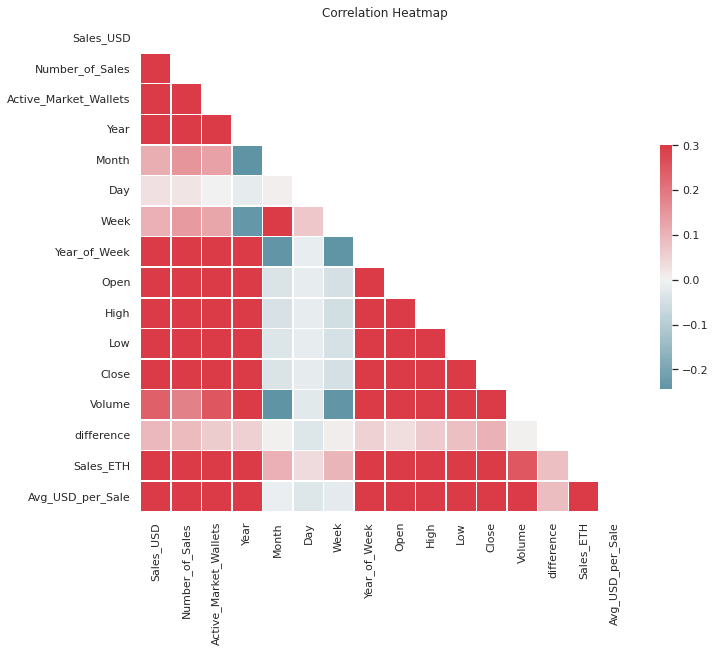

In [ ]:
sns.set(style = "white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

#Part 4 XPath
###Brought to you by popular demand from students...

So far, we've looked at data on NFT sales and Ethereum prices. Let's broaden our scope to look at the cryptocurrencies that had the highest percentage increase through 2021! The datasets we provide are compiled for us on Kaggle, but sometimes we need to create our own datasets! We'll do some web scraping and work web-based data!

On [fools.com](https://www.fool.com/the-ascent/cryptocurrency/articles/68-of-the-biggest-cryptos-gained-1000-or-more-in-2021/), we have a table with the top performing cryptocurrencies in 2021.

We get the DOM tree for you below.

In [ ]:
# Request the data and build the DOM tree (we've done this for you!)
w = requests.get("https://www.fool.com/the-ascent/cryptocurrency/articles/68-of-the-biggest-cryptos-gained-1000-or-more-in-2021/")
dom_tree = html.fromstring(w.content)
print(dom_tree)

<Element html at 0x7f522a48df50>


## 4.1 Cryptocurrency Names

TODO: Create `x_path_crypto_name` and `crypto_names`.

`x_path_crypto_name` should be the value you pass in for dom_tree.xpath() to retrive names of the 68 top performers.

It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!).

Hint: The Xpath for the table itself is, at the table-level is "//div[@class='wysiwyg copy-body']/div[3]/div/table/", this is also the beginning part of the `x_path_crypto_name` string. 

You can use the 'inspect' tool on the website and see the various html tags and labels, to figure out how we generate the Xpath for the table!

Your job is to go into several more steps to get the text content of one column of each row, to get the entire `x_path_crypto_name` string

In [ ]:
# TODO: Define the xpath string
x_path_crypto_name = "//div[@class='wysiwyg copy-body']/div[3]/div/table/tbody/tr/td[2]/text()"

Now, pass `x_path_crypto_name` into dom_tree.xpath to get the list of top performers. Save this list to `crypto_name`.

You may find that the retrieved names are be surrounded by spaces and newline characters `\n`. Remove these spaces and newline characters from the names.

For example, you may get '\n                          \n                              \n                                  Gala (GALA)\n                              \n                          \n                      '. This should be 'Gala (GALA)' instead.

In [ ]:
# TODO: Generate the list of cryptocurrency names by applying the xpath string to the dom_tree object, save the result to crypto_names.
# You will see that every item is surrounded by spaces and '\n' characters and you must strip it!!
# def clean_name(x):
#   return x.replace('\n', '').replace(' ', '')
crypto_name_original = dom_tree.xpath(x_path_crypto_name)
crypto_name = [x.strip() for x in crypto_name_original]

In [ ]:
# TEST CASE: crypto_name (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'crypto_name', answer = crypto_name)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.2 Names
TODO: Create `x_path_percent` and `percent_increase`

This should be very similar to scraping names. Change the xpath accordingly to get the Percentage Increase column of the table into a list! 

`x_path_percent` is the xpath string to pass into dom_tree.xpath() to retrive percentage increase of the 68 top performers.

`percent_increase` is the list of percentage increase of the top 68 performers. Elements in this list should be ints.

In [ ]:
# TODO: Define the xpath string
x_path_percent = "//div[@class='wysiwyg copy-body']/div[3]/div/table/tbody/tr/td[4]/text()"

In [ ]:
# TODO: Generate the list of percentage increase by applying the xpath string to the dom_tree object, save the result to percent_increase.
# Turn each elemnt into an int. For example, the first element should be 40445
def clean_percent(x):
  return int(x.replace('\n', '').replace(' ', '').replace('%', '').replace(',', ''))
percent_increase_original = dom_tree.xpath(x_path_percent)
percent_increase = [clean_percent(x) for x in percent_increase_original]

In [ ]:
# TEST CASE: percent_increase (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'percent_increase', answer = percent_increase)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.3 Putting it together!

Create a dataframe called `top_performers_df` by using the `crypto_name` and `percent_increase` lists that you created in 4.1 and 4.2.

The dataframe should have 2 columns. The first should be called `crypto_name`. The second should be called `percent_increase`. The data for these columns should come from the lists.

In [ ]:
# TODO: Create top_performers_df with crypto_name and percent_increase as columns.
top_performers_df = pd.DataFrame(list(zip(crypto_name, percent_increase)), columns = ['crypto_name','percent_increase'])

In [ ]:
top_performers_df

,crypto_name,percent_increase
0,Gala (GALA),40445
1,CEEK VR (CEEK),25270
2,Anyswap (ANY),16652
3,XYO (XYO),15808
4,Axie Infinity (AXS),15132
...,...,...
63,Hive (HIVE),1046
64,Dvision Network (DVI),1032
65,MediBloc (MED),1023
66,Syscoin (SYS),1019


In [ ]:
# TEST CASE: top_performers_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'top_performers_df', answer = top_performers_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 4.4 Summary Statistics

Now that we scraped some data ingredients from the web, let's look them!

Use describe() function to get a summary on the `percent_increase` column and save the summary to `top_performers_stats`

In [ ]:
# TODO: Save the summary of the percent_increase column to top_performers_stats
# Hint: Use the .describe() function
top_performers_stats = top_performers_df.percent_increase.describe()

In [ ]:
top_performers_stats

count       68.000000
mean      4423.308824
std       6394.590728
min       1000.000000
25%       1318.750000
50%       1861.500000
75%       4061.500000
max      40445.000000
Name: percent_increase, dtype: float64

In [ ]:
# TEST CASE: top_performers_stats (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'top_performers_stats', answer = top_performers_stats)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# HW Submission

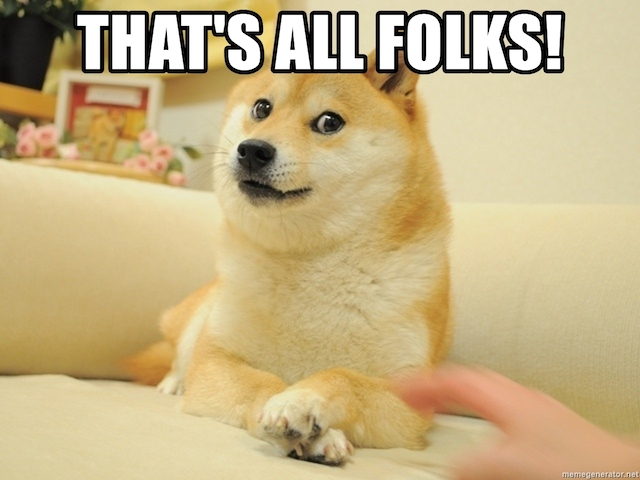

The good news is you basically know the score you already got because of the autograder. In fact, since for the first time the autograder is integrated into Gradescope, you should be able to see your autograder score automatically! Beware since we'll check for plagirism, so make sure to cite your sources (if any) using simple urls / links.

Before you submit on Gradescope (you must submit your notebook to receive credit):


1.   Restart and Run-All to make sure there's nothing wrong with your notebook
2.   **Double check that you have the correct PennID (all numbers) in the autograder**. 
3. Make sure you've run all the PennGrader cells
4. Go to the "File" tab at the top left, and click "Download .ipynb" + "Download .py" and upload both the Python file and ipnyb notebook to Gradescope directly, just like HW0, naming the files "homework1"!

**Let the course staff know ASAP if you have any issues submitting, but otherwise best of luck! Congrats on finishing the first HW.**